# Prerequesites

In [9]:
import time
time_start = time.time()

In [10]:
#!pip install pandas numpy matplotlib seaborn sklearn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing the data

In [12]:
#Open blinks data from csv

#Make a filename that is a relative path to the data
filename = '../../Data/blinks.txt'

data = pd.read_csv(filename, sep=",", header=None)

In [13]:
#Removing columns 12-22
data = data.drop(data.columns[12:22], axis=1)
#Remove the first 1000 samples
data = data.drop(data.index[0:1000])
#Reindex the data
data = data.reset_index(drop=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,22,23
0,232,65204.73,51338.89,-15532.88,-21018.39,6220.27,-3776.89,6869.58,1464.67,0.038,0.770,0.604,1557936057322,12:00:57.322
1,233,64880.61,50822.25,-15317.76,-20962.36,6507.96,-3452.81,7167.31,1747.48,0.030,0.776,0.612,1557936057328,12:00:57.328
2,234,64431.11,50216.86,-15067.89,-20703.97,6782.68,-3201.98,7451.71,2030.59,0.030,0.776,0.612,1557936057328,12:00:57.328
3,235,64745.36,50724.85,-15302.41,-20786.18,6471.43,-3542.17,7128.49,1724.59,0.030,0.776,0.612,1557936057336,12:00:57.336
4,236,65189.55,51327.16,-15519.71,-20994.57,6219.91,-3786.32,6864.22,1460.75,0.030,0.776,0.612,1557936057336,12:00:57.336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21485,213,58750.42,47034.95,-18637.04,-27128.40,-9182.90,-18376.35,-5918.16,-6498.79,0.034,0.762,0.610,1557936143152,12:02:23.152
21486,214,59029.14,47391.53,-18737.73,-27217.09,-9327.85,-18544.50,-6069.39,-6654.94,0.028,0.768,0.614,1557936143152,12:02:23.152
21487,215,58890.72,47196.80,-18850.75,-27389.65,-9400.32,-18621.62,-6141.32,-6739.32,0.028,0.768,0.614,1557936143159,12:02:23.159
21488,216,58567.63,46769.70,-18777.12,-27361.26,-9255.01,-18427.36,-5976.43,-6570.79,0.028,0.768,0.614,1557936143166,12:02:23.166


0        14.686
1        14.762
2        14.762
3        14.762
4        14.762
          ...  
21485    14.636
21486    14.686
21487    14.686
21488    14.686
21489    14.686
Length: 21490, dtype: float64


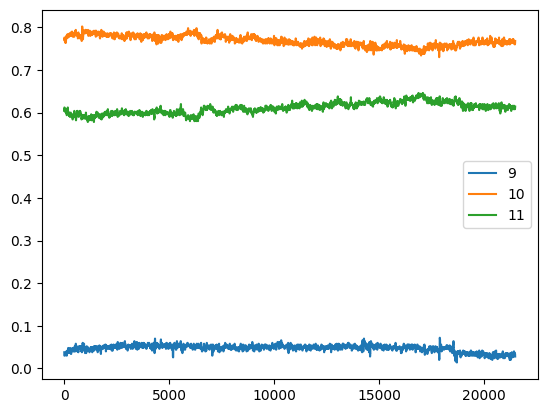

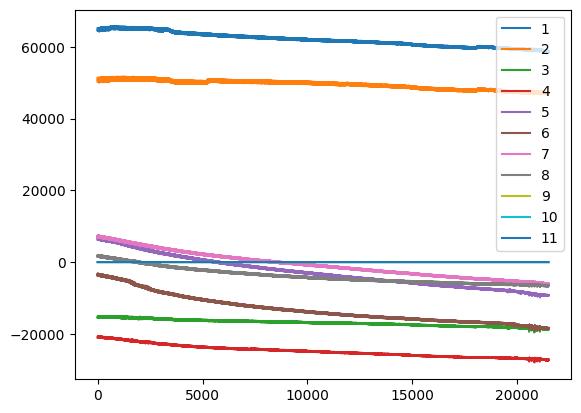

In [14]:
#Create a dataframe for the data, columns 1-11
useful_data = data.iloc[:,1:12]

#Create alpha labels, columns 9-11
alphaLabels = data.iloc[:,9:12]

#Create a 1d dataframe of the alphas summed
alphaSum = alphaLabels.mul([9,10,11]).sum(axis=1)

#Plot alpha labels
alphaLabels.plot()

#Ploting the data
useful_data.plot()

print(alphaSum)

In [15]:
#Create a empty dataframe for the labels
labels = pd.DataFrame()

#Make append 100 flatline labels to the labels dataframe
for i in range(100):
    labels = labels._append(pd.Series('flatline'), ignore_index=True)

#In alphaSum if the difference between the current and previous value is more or less than 0.001, then it is a spike up or down, otherwise it is a flatline: append to labels
#Initialize prev with 1st value of alphaSum
prev = 0
for i in range(100, len(alphaSum)):
    if (alphaSum[i] - prev) > 0.001:
        labels = labels._append(pd.Series('spike up'), ignore_index=True)
    elif (alphaSum[i] - prev) < -0.001:
        labels = labels._append(pd.Series('spike down'), ignore_index=True)
    else:
        labels = labels._append(pd.Series('flatline'), ignore_index=True)
    prev = alphaSum[i]

#Print the valuecounts of the labels
labels.value_counts()

flatline      19383
spike up       1079
spike down     1028
Name: count, dtype: int64

# Support Vector Classifier (SVC)

In [16]:
#SVC

#Split 20% of the data for testing in both tr_data and labels
tr_dataSVC, te_dataSVC, tr_labelsSVC, te_labelsSVC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of kernels, C values, degree, and gamma values
param_gridSVC = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#Create a grid search using the SVC classifier and the grid of parameters
gridSVC = GridSearchCV(SVC(random_state=0), param_gridSVC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridSVC.fit(tr_dataSVC, tr_labelsSVC)
#Print and store the best parameters, for finding testing error
print(gridSVC.best_params_)
best_paramsSVC = gridSVC.best_params_
#Print and store the best estimator, for finding testing error
print(gridSVC.best_estimator_)
#Print the scores
print(gridSVC.cv_results_['mean_test_score'])

/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ryan/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

KeyboardInterrupt: 

In [ ]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_svc = gridSVC.predict(te_dataSVC)
print(gridSVC.score(te_dataSVC, te_labelsSVC))

0.8967201674808095


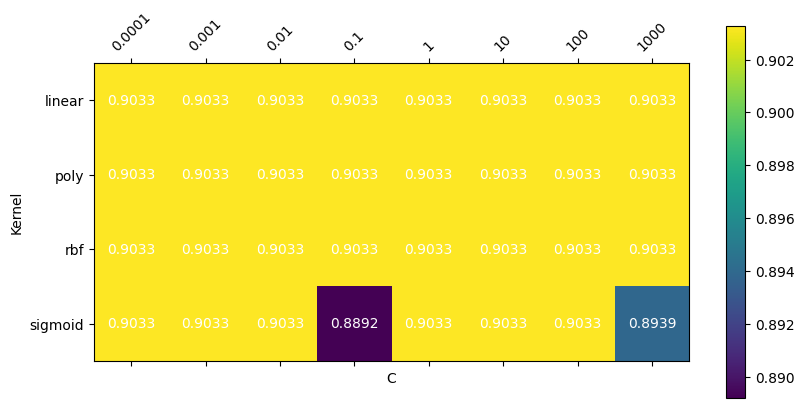

In [ ]:
#Plot the score for each parameter combination
scoresSVC = gridSVC.cv_results_['mean_test_score'].reshape(len(param_gridSVC['kernel']), len(param_gridSVC['C']))
plt.matshow(scoresSVC)
plt.xlabel('C')
plt.ylabel('Kernel')
plt.colorbar()
plt.xticks(np.arange(len(param_gridSVC['C'])), param_gridSVC['C'], rotation=45)
plt.yticks(np.arange(len(param_gridSVC['kernel'])), param_gridSVC['kernel'])
#Round all scores to 4 decimal places
scoresSVC = np.around(scoresSVC, decimals=4)
#Display score on each square
for i in range(len(param_gridSVC['kernel'])):
    for j in range(len(param_gridSVC['C'])):        
        plt.text(j, i, scoresSVC[i, j], ha='center', va='center', color='white')
plt.show()

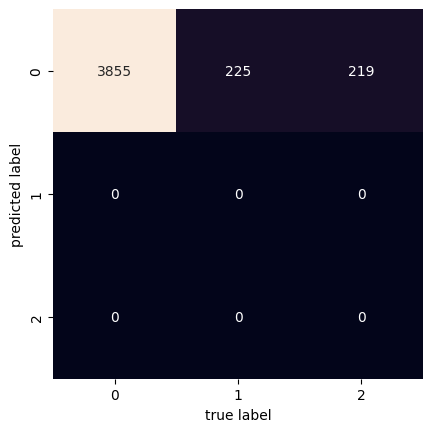

In [ ]:
#Plot the confusion matrix
matSVC = confusion_matrix(te_labelsSVC, pred_svc)
sns.heatmap(matSVC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Linear Discriminant Analysis (LDA)

In [ ]:
#LDA

#Split 20% of the data for testing in both tr_data and labels
tr_dataLDA, te_dataLDA, tr_labelsLDA, te_labelsLDA = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of solvers, shrinkage values, and priors
#param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto'], 'priors': [None, [0.5, 0.5]]}
#Only 28 of 48 valid, create a grid of only the valid parameters
param_gridLDA = {'solver': ['svd', 'lsqr', 'eigen'], 'priors': [None, [0.5, 0.5]]}
#Create a grid search using the LDA classifier and the grid of parameters
gridLDA = GridSearchCV(LinearDiscriminantAnalysis(), param_gridLDA, cv = 4)
#Fit the grid search to the data
gridLDA.fit(tr_dataLDA, tr_labelsLDA)
#Print and store the best parameters, for finding testing error
print(gridLDA.best_params_)
best_paramsLDA = gridLDA.best_params_
#Print and store the best estimator, for finding testing error
print(gridLDA.best_estimator_)
#Print the scores
print(gridLDA.cv_results_['mean_test_score'])

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'priors': None, 'solver': 'svd'}
LinearDiscriminantAnalysis()
[0.90326896 0.90326896 0.90326896        nan        nan        nan]


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [ ]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_lda = gridLDA.predict(te_dataLDA)
print(gridLDA.score(te_dataLDA, te_labelsLDA))

0.8967201674808095


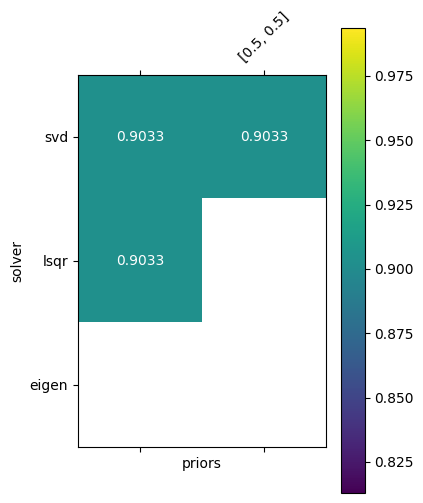

In [ ]:
#Plot the score for each parameter combination
scoresLDA = gridLDA.cv_results_['mean_test_score'].reshape(len(param_gridLDA['solver']), len(param_gridLDA['priors']))
plt.matshow(scoresLDA)
plt.xlabel('priors')
plt.ylabel('solver')
plt.colorbar()
plt.xticks(np.arange(len(param_gridLDA['priors'])), param_gridLDA['priors'], rotation=45)
plt.yticks(np.arange(len(param_gridLDA['solver'])), param_gridLDA['solver'])
#Round all scores to 4 decimal places
scoresLDA = np.around(scoresLDA, decimals=4)
#Display score on each square
for i in range(len(param_gridLDA['solver'])):
    for j in range(len(param_gridLDA['priors'])):        
        plt.text(j, i, scoresLDA[i, j], ha='center', va='center', color='white')
plt.show()


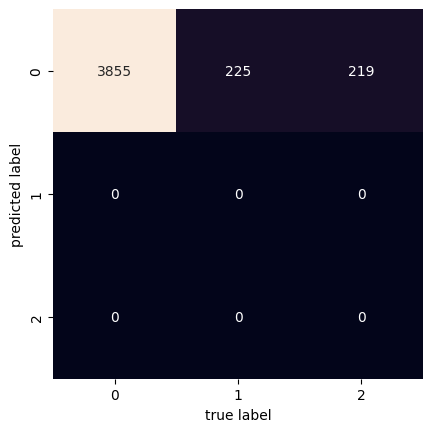

In [ ]:
#Plot the confusion matrix
matLDA = confusion_matrix(te_labelsLDA, pred_lda)
sns.heatmap(matLDA.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Random Forest Classifier (RFC)

In [ ]:
#RandomForestClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataRFC, te_dataRFC, tr_labelsRFC, te_labelsRFC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, max_depth, and max_features
#param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10], 'max_features': ['auto', 'sqrt', 'log2']}
#Only 36 of 108 valid, create a grid of only the valid parameters
param_gridRFC = {'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 5, 10, 50]}
#Create a grid search using the RandomForestRegressor classifier and the grid of parameters
gridRFC = GridSearchCV(RandomForestClassifier(random_state=0), param_gridRFC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridRFC.fit(tr_dataRFC, tr_labelsRFC)
#Print and store the best parameters, for finding testing error
print(gridRFC.best_params_)
best_paramsRFC = gridRFC.best_params_
#Print and store the best estimator, for finding testing error
print(gridRFC.best_estimator_)
#Print the scores
print(gridRFC.cv_results_['mean_test_score'])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

{'max_depth': 5, 'n_estimators': 100}
RandomForestClassifier(max_depth=5, random_state=0)
[0.89890647 0.9025128  0.9025128  0.90245463 0.90309446 0.90315263
 0.90315263 0.90315263 0.9030363  0.90309446 0.90309446 0.90315263
 0.8990228  0.90239646 0.90257096 0.90257096]


In [ ]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_rfc = gridRFC.predict(te_dataRFC)
print(gridRFC.score(te_dataRFC, te_labelsRFC))

0.8967201674808095


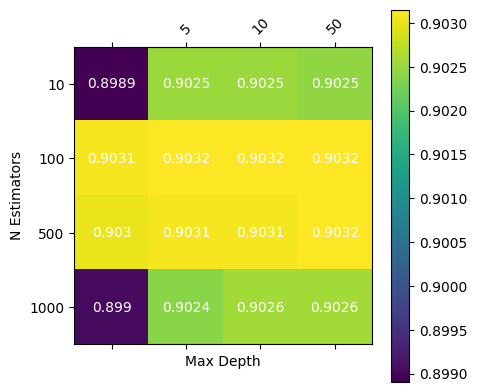

In [ ]:
#Plot the score for the parameter combination in the RFC
scoresRFC = gridRFC.cv_results_['mean_test_score'].reshape(len(param_gridRFC['n_estimators']), len(param_gridRFC['max_depth']))
plt.matshow(scoresRFC)
plt.xlabel('Max Depth')
plt.ylabel('N Estimators')
plt.colorbar()
plt.xticks(np.arange(len(param_gridRFC['max_depth'])), param_gridRFC['max_depth'], rotation=45)
plt.yticks(np.arange(len(param_gridRFC['n_estimators'])), param_gridRFC['n_estimators'])
#Round all scores to 4 decimal places
scoresRFC = np.around(scoresRFC, decimals=4)
#Display score on each square
for i in range(len(param_gridRFC['n_estimators'])):
    for j in range(len(param_gridRFC['max_depth'])):        
        plt.text(j, i, scoresRFC[i, j], ha='center', va='center', color='white')
plt.show()

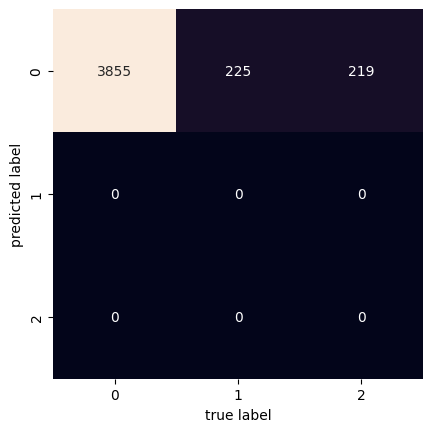

In [ ]:
#Plot the confusion matrix
matRFC = confusion_matrix(te_labelsRFC, pred_rfc)
sns.heatmap(matRFC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

[0.1335252  0.12572711 0.10946684 0.09529491 0.08794045 0.09181245
 0.10440955 0.10723339 0.04253148 0.05749807 0.04456053]


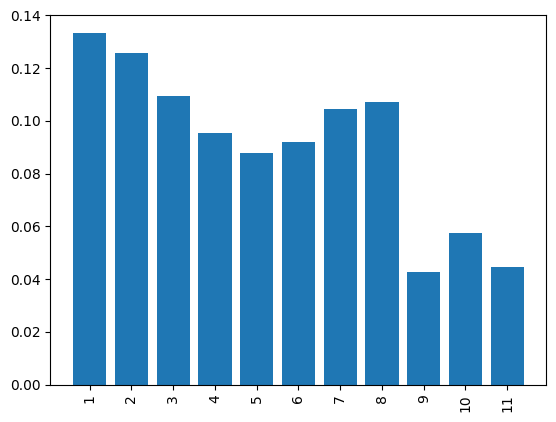

In [ ]:
#List feature importances
print(gridRFC.best_estimator_.feature_importances_)
#Plot feature importances
plt.bar(range(11), gridRFC.best_estimator_.feature_importances_)
plt.xticks(range(11), useful_data.columns, rotation=90)
plt.show()

# Gradient Boosting Classifier (GBC)

In [ ]:
#GradientBoostingClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataGBC, te_dataGBC, tr_labelsGBC, te_labelsGBC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, max_depth, and max_features
param_gridGBC = {'n_estimators': [10, 100, 500, 1000], 'max_depth': [None, 5, 10, 50]}
#Create a grid search using the GradientBoostingClassifier classifier and the grid of parameters
gridGBC = GridSearchCV(GradientBoostingClassifier(random_state=0), param_gridGBC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridGBC.fit(tr_dataGBC, tr_labelsGBC)
#Print and store the best parameters, for finding testing error
print(gridGBC.best_params_)
best_paramsGBC = gridGBC.best_params_
#Print and store the best estimator, for finding testing error
print(gridGBC.best_estimator_)
#Print the scores
print(gridGBC.cv_results_['mean_test_score'])

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'max_depth': 5, 'n_estimators': 10}
GradientBoostingClassifier(max_depth=5, n_estimators=10, random_state=0)
[0.89128664 0.876745   0.87750116 0.87750116 0.9030363  0.90152396
 0.8974523  0.8965798  0.90280363 0.8995463  0.89890647 0.8983248
 0.89751047 0.88762215 0.88832015 0.88832015]


In [ ]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_gbc = gridGBC.predict(te_dataGBC)
print(gridGBC.score(te_dataGBC, te_labelsGBC))

0.8967201674808095


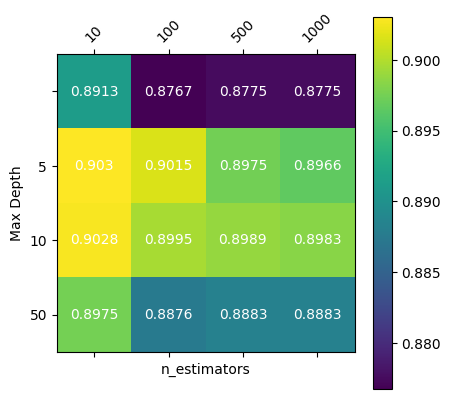

In [ ]:
#Plot the score for each parameter combination
scoresGBC = gridGBC.cv_results_['mean_test_score'].reshape(len(param_gridGBC['n_estimators']), len(param_gridGBC['max_depth']))
plt.matshow(scoresGBC)
plt.xlabel('n_estimators')
plt.ylabel('Max Depth')
plt.colorbar()
plt.xticks(np.arange(len(param_gridGBC['n_estimators'])), param_gridGBC['n_estimators'], rotation=45)
plt.yticks(np.arange(len(param_gridGBC['max_depth'])), param_gridGBC['max_depth'])
#Round all scores to 4 decimal places
scoresGBC = np.around(scoresGBC, decimals=4)
#Display score on each square
for i in range(len(param_gridGBC['n_estimators'])):
    for j in range(len(param_gridGBC['max_depth'])):        
        plt.text(j, i, scoresGBC[i, j], ha='center', va='center', color='white')
plt.show()

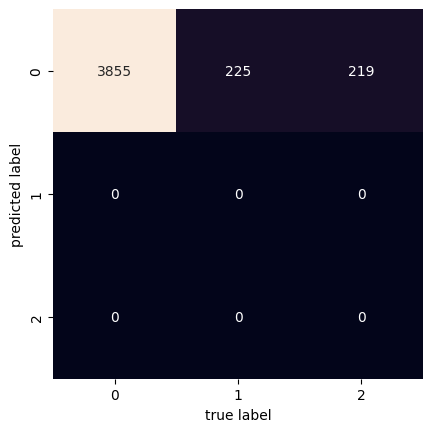

In [ ]:
#Plot the confusion matrix
matGBC = confusion_matrix(te_labelsGBC, pred_gbc)
sns.heatmap(matGBC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# AdaBoost Classifier (ABC)

In [ ]:
#AdaBoostClassifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataABC, te_dataABC, tr_labelsABC, te_labelsABC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Create a grid of n_estimators, learning_rate, and algorithm
param_gridABC = {'n_estimators': [10, 100, 500, 1000], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'algorithm': ['SAMME', 'SAMME.R']}
#Create a grid search using the AdaBoostClassifier classifier and the grid of parameters
gridABC = GridSearchCV(AdaBoostClassifier(random_state=0), param_gridABC, cv = 4, verbose=0, n_jobs=-1)
#Fit the grid search to the data
gridABC.fit(tr_dataABC, tr_labelsABC)
#Print and store the best parameters, for finding testing error
print(gridABC.best_params_)
best_paramsABC = gridABC.best_params_
#Print and store the best estimator, for finding testing error
print(gridABC.best_estimator_)
#Print the scores
print(gridABC.cv_results_['mean_test_score'])

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 500}
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001, n_estimators=500,
                   random_state=0)
[0.9030363  0.9030363  0.9030363  0.9030363  0.9030363  0.9030363
 0.90326896 0.90326896 0.9030363  0.90326896 0.90326896 0.90326896
 0.90326896 0.90326896 0.90326896 0.90326896 0.9030363  0.9030363
 0.9030363  0.9030363  0.0536296  0.9030363  0.9030363  0.9030363
 0.04310144 0.04310144 0.04310144 0.04310144 0.9030363  0.9030363
 0.9030363  0.9030363  0.9030363  0.9030363  0.9030363  0.9030363
 0.9030363  0.9030363  0.90326896 0.90326896 0.9030363  0.90326896
 0.90326896 0.90326896 0.9030363  0.9030363  0.90315263 0.90315263
 0.9030363  0.90297813 0.90152396 0.89925547 0.04728944 0.9030363
 0.9030363  0.9030363  0.04519544 0.04519544 0.04519544 0.04519544
 0.9030363  0.9030363  0.9030363  0.9030363 ]


In [ ]:
#Use the best parameters and estimator to predict the testing data, and print the accuracy
pred_abc = gridABC.predict(te_dataABC)
print(gridABC.score(te_dataABC, te_labelsABC))

0.8967201674808095


In [ ]:
#Plot the score for each parameter combination for algorithm: SAMME
# import matplotlib.pyplot as plt
# plt.title('Algorithm: SAMME')

#Plot the score for each parameter combination for algorithm: SAMME.R
# import matplotlib.pyplot as plt
# plt.title('Algorithm: SAMME.R')


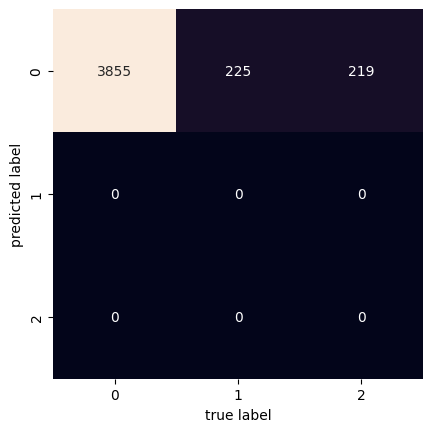

In [ ]:
#Plot the confusion matrix
matABC = confusion_matrix(te_labelsABC, pred_abc)
sns.heatmap(matABC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Voting Classifier (VC)

Lets create a majority voting classifier using the following classifiers:
- SVC
- LDA
- RFC
- GBC
- ABC

In [ ]:
#Majority vote classifier

#Split 20% of the data for testing in both tr_data and labels
tr_dataVC, te_dataVC, tr_labelsVC, te_labelsVC = train_test_split(useful_data, labels, test_size=0.2, random_state=42)

#Initialize the classifiers
svm_clf = SVC(random_state=0)
lda_clf = LinearDiscriminantAnalysis()
rnd_clf = RandomForestClassifier(random_state=0)
gbc_clf = GradientBoostingClassifier(random_state=0)
abc_clf = AdaBoostClassifier(random_state=0)

#Create a voting classifier using the 3 classifiers
voting_clf = VotingClassifier(estimators=[('lr', lda_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gbc', gbc_clf), ('abc', abc_clf)], voting='hard')
#Fit the voting classifier to the data
voting_clf.fit(tr_dataVC, tr_labelsVC)

/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LinearDiscriminantAnalysis()),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('svc', SVC(random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(random_state=0)),
                             ('abc', AdaBoostClassifier(random_state=0))])

In [ ]:
#Use the voting classifier to predict the testing data, and print the accuracy
voting_pred = voting_clf.predict(te_dataVC)
print(accuracy_score(te_labelsVC, voting_pred))

0.8967201674808095


In [ ]:
#Print the labeled score for each model
for clf in (lda_clf, rnd_clf, svm_clf, gbc_clf, abc_clf, voting_clf):
    clf.fit(tr_dataVC, tr_labelsVC)
    y_pred = clf.predict(te_dataVC)
    print(clf.__class__.__name__, accuracy_score(te_labelsVC, y_pred))

LinearDiscriminantAnalysis 0.8967201674808095


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier 0.8964875552454059


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.8967201674808095


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier 0.8967201674808095


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier 0.8967201674808095


/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier 0.8967201674808095


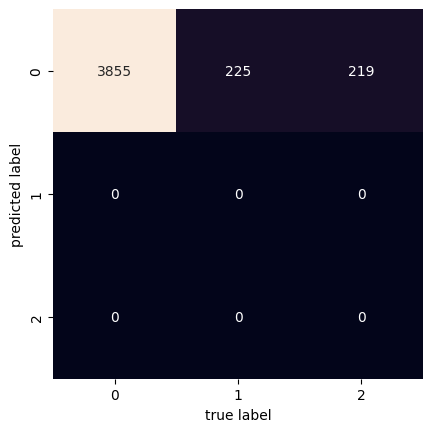

In [ ]:
#Plot the confusion matrix
matVC = confusion_matrix(te_labelsVC, voting_pred)
sns.heatmap(matVC.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# Collecting the results

In [ ]:
#Printing each models training, testing error, and the best parameters 

#SVC
print('SVC')
print('Training error: ', 1 - gridSVC.best_score_)
print('Testing error: ', 1 - gridSVC.score(te_dataSVC, te_labelsSVC))
print('Best parameters: ', best_paramsSVC)

#LDA
print('LDA')
print('Training error: ', 1 - gridLDA.best_score_)
print('Testing error: ', 1 - gridLDA.score(te_dataLDA, te_labelsLDA))
print('Best parameters: ', best_paramsLDA)

#RFC
print('RFC')
print('Training error: ', 1 - gridRFC.best_score_)
print('Testing error: ', 1 - gridRFC.score(te_dataRFC, te_labelsRFC))
print('Best parameters: ', best_paramsRFC)

#GBC
print('GBC')
print('Training error: ', 1 - gridGBC.best_score_)
print('Testing error: ', 1 - gridGBC.score(te_dataGBC, te_labelsGBC))
print('Best parameters: ', best_paramsGBC)

#ABC
print('ABC')
print('Training error: ', 1 - gridABC.best_score_)
print('Testing error: ', 1 - gridABC.score(te_dataABC, te_labelsABC))
print('Best parameters: ', best_paramsABC)

#Majority vote
print('Majority vote')
print('Training error: ', 1 - voting_clf.score(tr_dataVC, tr_labelsVC))
print('Testing error: ', 1 - voting_clf.score(te_dataVC, te_labelsVC))

SVC
Training error:  0.09673103769194968
Testing error:  0.10327983251919048
Best parameters:  {'C': 0.0001, 'kernel': 'linear'}
LDA
Training error:  0.09673103769194968
Testing error:  0.10327983251919048
Best parameters:  {'priors': None, 'solver': 'svd'}
RFC
Training error:  0.09684737087017203
Testing error:  0.10327983251919048
Best parameters:  {'max_depth': 5, 'n_estimators': 100}
GBC
Training error:  0.0969637040483946
Testing error:  0.10327983251919048
Best parameters:  {'max_depth': 5, 'n_estimators': 10}
ABC
Training error:  0.09673103769194968
Testing error:  0.10327983251919048
Best parameters:  {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 500}
Majority vote
Training error:  0.0967310376919498
Testing error:  0.10327983251919048


# Notebook Runtime

In [ ]:
#Time to finish
time_end = time.time()
print('Time to finish:', time_end - time_start, 'seconds')

Time to finish: 1668.5748670101166 seconds
